# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print (query_url)

for index, city in np.ndenumerate(cities):
    print(index[0],": ", city)

0 :  parrita
1 :  pangnirtung
2 :  constitucion
3 :  saint-philippe
4 :  jamestown
5 :  tomatlan
6 :  conceicao do araguaia
7 :  albany
8 :  ayan
9 :  carnarvon
10 :  illoqqortoormiut
11 :  mataura
12 :  mahebourg
13 :  chokurdakh
14 :  kichmengskiy gorodok
15 :  yakeshi
16 :  mys shmidta
17 :  ushuaia
18 :  yovon
19 :  rikitea
20 :  police
21 :  mount pleasant
22 :  nikolskoye
23 :  airai
24 :  busselton
25 :  hobart
26 :  asilah
27 :  taolanaro
28 :  ngukurr
29 :  komsomolskiy
30 :  hermanus
31 :  novyy urengoy
32 :  ancud
33 :  arraial do cabo
34 :  cairns
35 :  algiers
36 :  punta arenas
37 :  hilo
38 :  lasa
39 :  santa isabel do rio negro
40 :  kamenka
41 :  severo-kurilsk
42 :  esperance
43 :  asau
44 :  west bay
45 :  talnakh
46 :  emerald
47 :  barrow
48 :  halalo
49 :  villa rica
50 :  tasiilaq
51 :  portel
52 :  butaritari
53 :  eureka
54 :  scottsburgh
55 :  avera
56 :  sorong
57 :  avarua
58 :  chagda
59 :  verkhneyarkeyevo
60 :  amderma
61 :  mar del plata
62 :  bandarbey

In [ ]:
http://api.openweathermap.org/data/2.5/weather?appid=a06654f281500ab038da9f513e3722b3&units=imperial&q=

In [7]:
# set up lists to hold reponse info
city = []
cloudiness = []
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# Loop through the list of cities and perform a request for data on each
#cities = ["east london"]
for city_ in cities:
    #print(requests.get(query_url + city_).url)
    response = requests.get(query_url + city_).json()
    #pprint(response)
    try:
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"{city_} FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    except:
        print(f"{city_} NOT FOUND *********")
        pass

parrita FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
pangnirtung FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
constitucion FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
saint-philippe FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
jamestown FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
tomatlan FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
conceicao do araguaia FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
albany FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ayan FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
carnarvon FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
illoqqortoormiut NO

jalu FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
coquimbo FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
pevek FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
lexington FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
marzuq FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
miyako FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
meppen FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
longyearbyen FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kapaa FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
pinawa FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
castro FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>

namibe FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
polyarnyy FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
hasaki FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
bur gabo NOT FOUND *********
johi FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
sakakah FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
tandalti FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
saquena FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
cape town FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
myre FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
chiredzi FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kenai FOUND <<<<<<<<<<<

kayerkan FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
shirokiy FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kashi FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
mount gambier FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
palmerston north FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
matagami FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
umm kaddadah FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kulu FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
codrington FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
lebu FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
marv dasht NOT FOUND *********
p

clyde river FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
alyangula FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
rio grande FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
norman wells FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
attawapiskat NOT FOUND *********
liancheng FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
zhanaozen FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
wahran NOT FOUND *********
touros FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
gushikawa FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
zaragoza FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
palmer FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>

nuevitas FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
teguise FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
andevoranto NOT FOUND *********
zalantun FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
sur FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
bourail FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
svetlaya FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
krasnoselkup FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ciudad bolivar FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
acajutla FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
vaitupu NOT FOUND *********
elmvale FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>

kruisfontein FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
shubarkuduk FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
zhongshu FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
bilopillya FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
cherdakly FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
chatrapur FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
savigliano FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ostrovnoy FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
stephenville crossing FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kokkola FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
sokoto FOUND <

In [12]:
weather_dict = {
    "City": city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng": lng,
    "Max temp": max_temp,
    "Wind Speed": wind_speed,
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/weatherdata2.csv",index_label="CityID")
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max temp,Wind Speed
0,Parrita,75,CR,1580260753,94,9.52,-84.32,68.00,3.36
1,Pangnirtung,9,CA,1580260753,84,66.15,-65.71,-26.73,3.31
2,Constitucion,30,CL,1580260753,68,-35.33,-72.42,58.51,16.02
3,Saint-Philippe,90,RE,1580260753,64,-21.36,55.77,73.40,8.05
4,Jamestown,90,US,1580260754,92,42.10,-79.24,32.00,6.93
...,...,...,...,...,...,...,...,...,...
553,Hambantota,40,LK,1580261375,100,6.12,81.12,69.80,5.82
554,Katangli,58,RU,1580261375,94,51.71,143.23,4.26,0.49
555,Atar,0,MR,1580261376,20,20.52,-13.05,73.83,11.41
556,Pokrovskoye,100,RU,1580261376,80,47.42,38.90,41.18,12.33


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

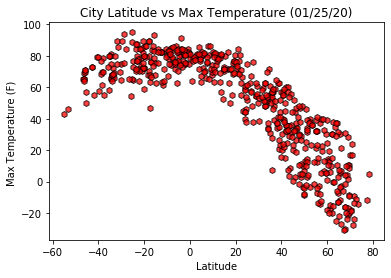

In [41]:

plt.scatter(weather_data['Lat'],weather_data["Max temp"], marker="h", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Max Temperature (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F) ")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig1.png")
plt.show()


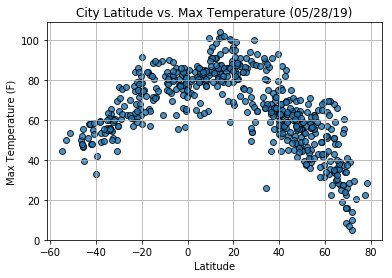

#### Latitude vs. Humidity Plot

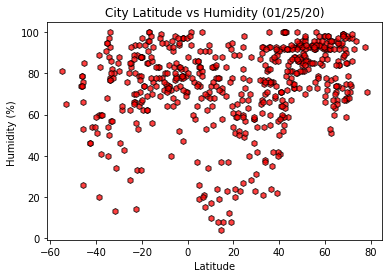

In [42]:
plt.scatter(weather_data['Lat'],weather_data["Humidity"], marker="h", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Humidity (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%) ")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig2.png")
plt.show()

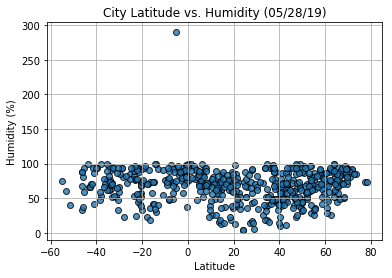

#### Latitude vs. Cloudiness Plot

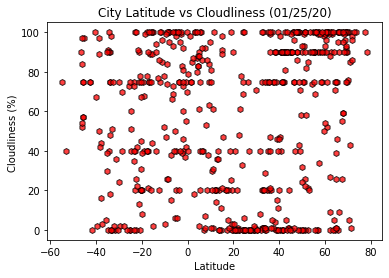

In [43]:
plt.scatter(weather_data['Lat'],weather_data["Cloudiness"], marker="h", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Cloudliness (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness (%) ")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig3.png")
plt.show()

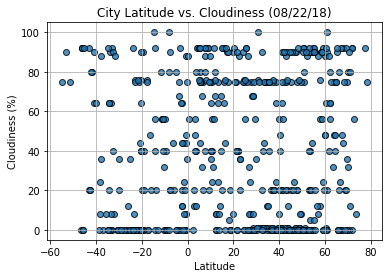

#### Latitude vs. Wind Speed Plot

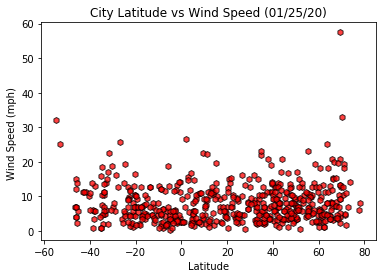

In [45]:
plt.scatter(weather_data['Lat'],weather_data["Wind Speed"], marker="h", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Wind Speed (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) ")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig4.png")
plt.show()

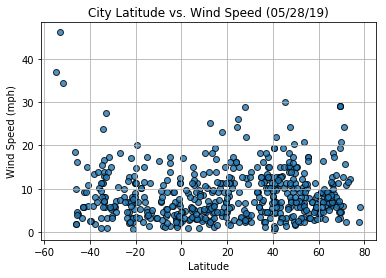

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
weather_dataN = weather_data[weather_data.Lat>0]
weather_dataN
weather_dataS = weather_data[weather_data.Lat<0]
weather_dataS

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max temp,Wind Speed
2,Constitucion,30,CL,1580260753,68,-35.33,-72.42,58.51,16.02
3,Saint-Philippe,90,RE,1580260753,64,-21.36,55.77,73.40,8.05
6,Conceicao do Araguaia,100,BR,1580260756,93,-8.26,-49.26,73.90,0.74
9,Carnarvon,40,AU,1580260756,83,-24.87,113.63,77.00,19.46
10,Mataura,52,NZ,1580260867,74,-46.19,168.86,64.99,7.00
...,...,...,...,...,...,...,...,...,...
542,Vila Velha,75,BR,1580261079,88,-20.33,-40.29,82.00,10.29
543,Tamandare,26,BR,1580261374,73,-8.76,-35.10,81.34,12.30
546,Samfya,96,ZM,1580261374,95,-11.36,29.56,63.97,3.31
550,Balclutha,54,NZ,1580261375,79,-46.23,169.75,64.00,4.00


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8743236087043229


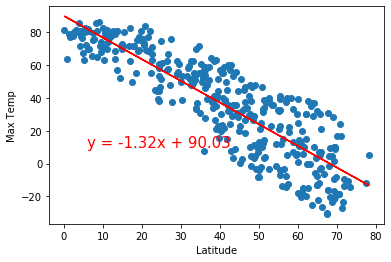

In [46]:
x_values = weather_dataN["Lat"]
y_values = weather_dataN["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig5.png")
plt.show()

The r-squared is: -0.8151657406810827


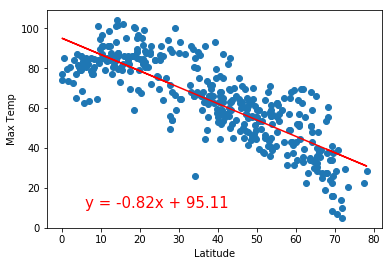

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4583811908200658


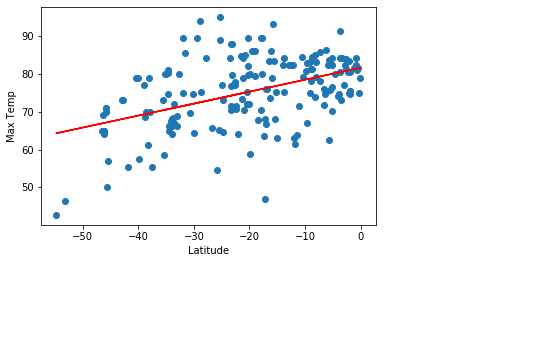

In [47]:
x_values = weather_dataS["Lat"]
y_values = weather_dataS["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig6.png")
plt.show()

The r-squared is: 0.760263355051646


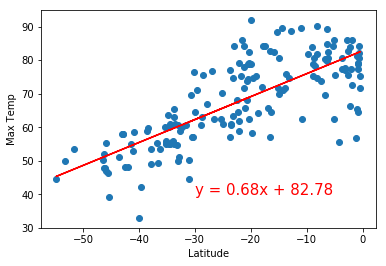

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40850000333762737


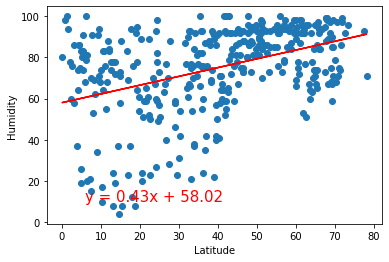

In [48]:
x_values = weather_dataN["Lat"]
y_values = weather_dataN["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig7.png")
plt.show()

The r-squared is: 0.10358336015746494


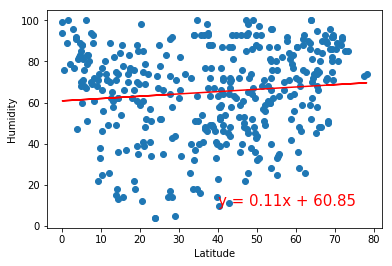

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2969914974767252


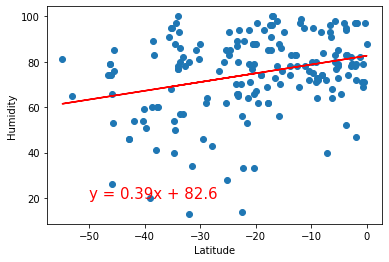

In [49]:
x_values = weather_dataS["Lat"]
y_values = weather_dataS["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig8.png")
plt.show()

The r-squared is: 0.14689473425583055


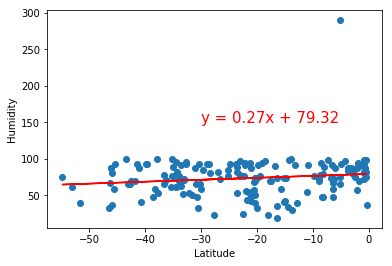

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29043424410725316


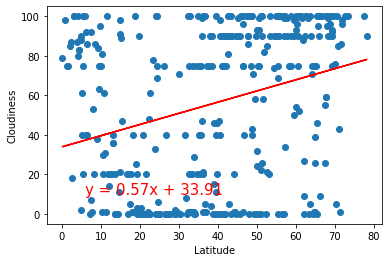

In [50]:
x_values = weather_dataN["Lat"]
y_values = weather_dataN["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig9.png")
plt.show()

The r-squared is: -0.08733547918934018


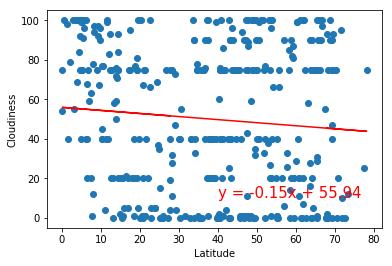

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16572236794673711


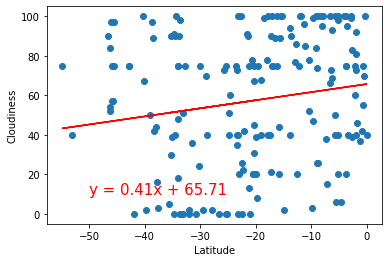

In [51]:
x_values = weather_dataS["Lat"]
y_values = weather_dataS["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig10.png")
plt.show()

The r-squared is: 0.21881426893991618


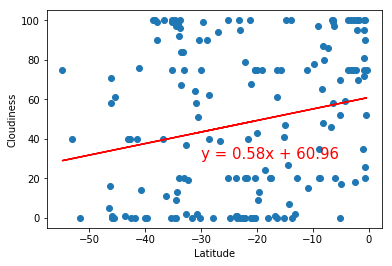

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11578212502610832


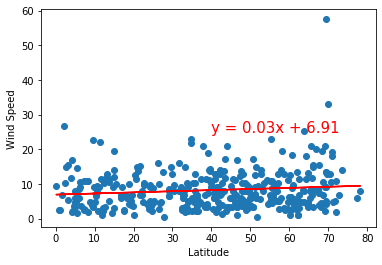

In [52]:
x_values = weather_dataN["Lat"]
y_values = weather_dataN["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig11.png")
plt.show()

The r-squared is: 0.1071382774388479


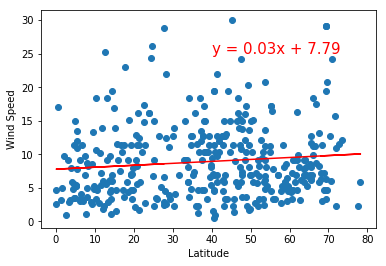

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3345296045856675


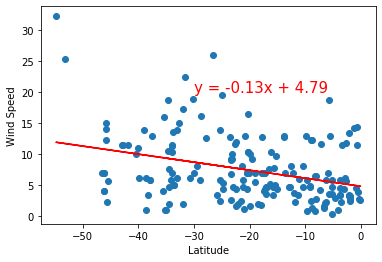

In [53]:
x_values = weather_dataS["Lat"]
y_values = weather_dataS["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.savefig("/Users/khushbooshah/Desktop/My work/Homework/python-api-challenge/VacationPy/output_data2/Myfig12.png")
plt.show()

The r-squared is: -0.322483077139538


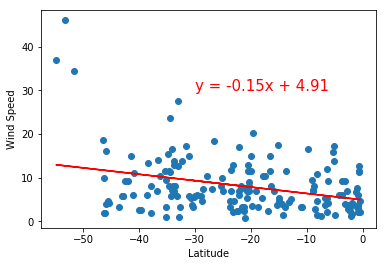

In [ ]:
Observable Trends

After plotting scatter plot and running regression analysis on 558 cities based on their location,  weather, temperature and various other parameters, all scattered across globe the following trends can be observed with certain confidence:

	The Max temperature of a city is directly related to its proximity from the Equator. The closer a city is to the equator the higher its Max temperature and vice versa.(MyFig1). This can also be seen by the correlation coefficient (r) for the variables Max Temp and Latitude for the Northern Hemisphere  -0.87432 which signifies a very strong inverse relationship between both of the variables.(MyFig5)

	Upon observing the Cloudiness vis-à-vis the Latitude of a location it can be observed that the cloudiness is particularly higher or concentrated in areas where there is a land mass (continents) vs above oceans.(MyFig3)


	From looking at the plots for the variables Wind Speed and Latitude it can be observed that the burst of high wind speeds i.e. the outliers seem to fall in the extreme values of the Latitude (the north and the south poles) (MyFig4)


